In [56]:
import pandas as pd
from math import pi
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
from scipy.stats.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn import preprocessing , decomposition , neighbors
from sklearn.cross_validation import train_test_split
from sklearn import neighbors
import random

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline
init_notebook_mode(connected=True)
pd.options.mode.chained_assignment = None # Warning for chained copies disabled

/Users/Shared/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [5]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', low_memory=False, sep='\t')
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()
df.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,356001,356001,356024,356024,356017,356027,356027,338515,57714,119285,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
unique,356001,356001,3890,224751,224752,216836,216836,249245,42451,15563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0753695110089,http://world-en.openfoodfacts.org/product/0708...,usda-ndb-import,1489055829,2017-03-09T16:32:00Z,1439141742,2015-08-09T17:35:42Z,Ice Cream,Pâtes alimentaires au blé dur de qualité supér...,500 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,169868,20,20,30,30,411,201,5285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN


In [7]:
df.isnull().sum()

code                                        26
url                                         26
creator                                      3
created_t                                    3
created_datetime                            10
last_modified_t                              0
last_modified_datetime                       0
product_name                             17512
generic_name                            298313
quantity                                236742
packaging                               266067
packaging_tags                          266068
brands                                   29050
brands_tags                              29070
categories                              252728
categories_tags                         252752
categories_en                           252726
origins                                 330977
origins_tags                            331015
manufacturing_places                    314019
manufacturing_places_tags               314026
labels       

#### Data Cleaning

1.1 Empty columnns

In [8]:
#drop columns that do not contain any values
df = df.dropna(axis = 1, how = 'all')
df.shape

(356027, 147)

The following analysis will be focused on nutrition. This information is contained in the variables with the _100g suffix. Hence, I will only keep the products where at least one of these columns contain some information:

In [9]:
# looking at empty rows
composant = []
for s in df.columns:
    if '_100g' in s: composant.append(s)
df_subset_columns = df[composant]
print('empty _100g raws: {}'.format(df_subset_columns.isnull().all(axis=1).sum()))
#___________________
# and deleting them
df_new = df[df_subset_columns.notnull().any(axis=1)]

empty _100g raws: 55904


1.2 Redundant variables

In [10]:
list_columns = ['categories', 'categories_tags', 'categories_en']
df_new[df_new[list_columns].notnull().any(axis=1)][['product_name']+ list_columns][:20:3]

,product_name,categories,categories_tags,categories_en
176,Salade Cesar,Légumes-feuilles,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo..."
183,Pain Burger Artisan,Boulange,fr:boulange,fr:Boulange
188,Pâté au poulet,Poulets cuisinés,"en:meats,en:poultries,en:chickens,en:cooked-ch...","Meats,Poultries,Chickens,Cooked chicken"
199,Côtes du Rhône Villages 2014,"Boissons,Boissons alcoolisées,Vins,Vins frança...","en:beverages,en:alcoholic-beverages,en:wines,e...","Beverages,Alcoholic beverages,Wines,French win..."
228,Luxury Christmas Pudding,"Sugary snacks,Desserts,Biscuits and cakes,Cake...","en:sugary-snacks,en:biscuits-and-cakes,en:dess...","Sugary snacks,Biscuits and cakes,Desserts,Cake..."
238,Blle Pet 50CL Coca Cola Cherry,en:beverages,"en:beverages,en:sugared-beverages","Beverages,Sugared beverages"
249,7Up,"Sodas au citron,Boissons sucrées","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan..."


This short listing shows that there is some redundancy in the information: The categories_tags and categories_en seem similar in their content except for the en: prefix that has been removed from keywords in the second column.

Hence, in case a column exists with the _en suffix, I decide to delete all the columns without any suffix or ending with the _tags string:

In [11]:
columns_to_remove = []
for s in df_new.columns:
    if "_en" in s: 
        t = s.replace('_en', '')
        u = s.replace('_en', '_tags')
        print("{:<20} 'no suffix' -> {} ; '_tags' suffix -> {}".format(s,
                                t in df_new.columns, u in df_new.columns))
        if t in df_new.columns: columns_to_remove.append(t)
        if u in df_new.columns: columns_to_remove.append(u)
df_new.drop(columns_to_remove, axis = 1, inplace = True)

categories_en        'no suffix' -> True ; '_tags' suffix -> True
labels_en            'no suffix' -> True ; '_tags' suffix -> True
countries_en         'no suffix' -> True ; '_tags' suffix -> True
allergens_en         'no suffix' -> True ; '_tags' suffix -> False
traces_en            'no suffix' -> True ; '_tags' suffix -> True
additives_en         'no suffix' -> True ; '_tags' suffix -> True
states_en            'no suffix' -> True ; '_tags' suffix -> True
main_category_en     'no suffix' -> True ; '_tags' suffix -> False


1.3 Fix names in Countries
 - In this list, a few countries were not correctly translated or do not correspond to a valid database entry. A list of official country names is available on wikipedia.

In [12]:
def count_words(df, colonne = 'categories_en'):
    list_words = set()
    for word in df[colonne].str.split(','):
        if isinstance(word, float): continue
        list_words = set().union(word, list_words)       
    print("Nb of categories in '{}': {}".format(colonne, len(list_words)))
    return list(list_words)
list_countries = count_words(df, 'countries_en')

Nb of categories in 'countries_en': 224


In [13]:
country_replacement = {'Tunisie': 'Tunisia', 'Niederlande': 'Netherland', 
    'fr:Bourgogne-aube-nogent-sur-seine':'France', 'fr:Sverige': 'Sweden', 
    'Vereinigtes-konigreich': 'United Kingdom',  'fr:Suiza':'Switzerland',
    'fr:Kamerun':'Cameroon', 'Other-japon':'Japon', 'fr:Marokko':'Morocco', 
    'ar:Tunisie':'Tunisia', 'fr:Marseille-5':'France', 'Australie':'Australia',
    'fr:Marseille-6':'France', 'fr:Scotland':'United Kingdom', 'Soviet Union':'Russia',
    'fr:Vereinigte-staaten-von-amerika':'United States', 'fr:Neukaledonien':'France',
    'fr:Nederland':'Netherland', 'Mayotte':'France', 'Spanje':'Spain', 'Frankrijk':'France',
    'Suisse':'Switzerland', 'fr:Belgie':'Belgium', 'Other-turquie':'Turkey',
    'fr:Spanien':'Spain', 'Pays-bas':'Netherland', 'fr:Saudi-arabien':'Saudi Arabia',
    'Virgin Islands of the United States':'United States', 'fr:England':'England',
    'Allemagne':'Germany', 'fr:Vereinigtes-konigreich':'United Kingdom', 'Belgique':'Belgium',
    'United-states-of-america':'United States', 'Réunion':'France', 'Martinique':'France',
    'Guadeloupe':'France','French Guiana':'France', 'Czech':'Czech Republic', 'Quebec':'Canada',
    'fr:Quebec':'Canada', 'fr:Deutschland':'Germany', 'Saint Pierre and Miquelon':'France'}

In [14]:
#replace the incorrect entries in the dataframe
for index, countries in df['countries_en'].str.split(',').items():
    if isinstance(countries, float): continue
    country_name = []
    found = False
    for s in countries:
        if s in country_replacement.keys():
            found = True
            country_name.append(country_replacement[s])
        else:
            country_name.append(s)
    if found:
        df.loc[index, 'countries_en'] = ','.join(country_name)    

In [15]:
list_countries = count_words(df, 'countries_en')

Nb of categories in 'countries_en': 206


In [16]:
#count country frequency 
country_count = dict()
for country in list(list_countries):
    country_count[country] = df['countries_en'].str.contains(country).sum()

Plot on a map with Plotly

In [17]:
data = dict(type='choropleth',
locations = list(country_count.keys()),
locationmode = 'country names', z = list(country_count.values()),
text = list(country_count.keys()), colorbar = {'title':'Product nb.'},
colorscale=[[0.00, 'rgb(204,255,229)'], [0.01, 'rgb(51,160,44)'],
            [0.02, 'rgb(102,178,255)'], [0.03, 'rgb(166,206,227)'],
            [0.05, 'rgb(31,120,180)'], [0.10, 'rgb(251,154,153)'],
            [0.20, 'rgb(255,255,0)'], [1, 'rgb(227,26,28)']])
layout = dict(title='Availability of products per country',
geo = dict(showframe = True, projection={'type':'Mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

1.4 Examine key words

In [18]:
category_keys = count_words(df_new, 'categories_en')

Nb of categories in 'categories_en': 13328


In [19]:
count_keyword = dict()
for index, col in df_new['categories_en'].iteritems():
    if isinstance(col, float): continue
    for s in col.split(','):
        if s in count_keyword.keys():
            count_keyword[s] += 1
        else:
            count_keyword[s] = 1

keyword_census = []
for k,v in count_keyword.items():
    keyword_census.append([k,v])
keyword_census.sort(key = lambda x:x[1], reverse = True)
    

In [20]:
keyword_census[:5]

[['Plant-based foods and beverages', 25323],
 ['Plant-based foods', 21290],
 ['Beverages', 13790],
 ['Sugary snacks', 12188],
 ['Dairies', 10022]]

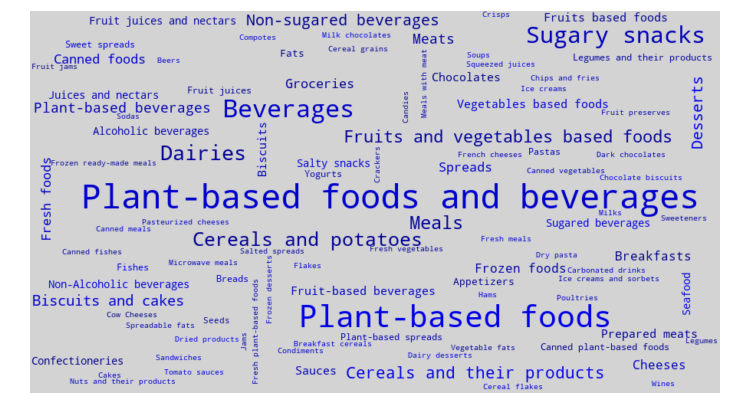

In [21]:
#_____________________________________________
# Function that control the color of the words
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(11,9))
ax1 = fig.add_subplot(1,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_census[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 170.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=900,height=500, background_color='lightgray', 
                      max_words=1628,relative_scaling=0.6,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')
plt.show()

In [22]:
#pick a category to focus on
pnns_group1_keys = count_words(df_new, 'pnns_groups_1')  
pnns_group2_keys = count_words(df_new, 'pnns_groups_2')  

Nb of categories in 'pnns_groups_1': 14
Nb of categories in 'pnns_groups_2': 42


In [23]:
#pick pnns groups 1
pnns_group1_keys

['sugary-snacks',
 'Beverages',
 'Fish Meat Eggs',
 'Fat and sauces',
 'Cereals and potatoes',
 'Salty snacks',
 'Sugary snacks',
 'salty-snacks',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'cereals-and-potatoes',
 'fruits-and-vegetables',
 'unknown']

In [24]:
corresp = dict()
corresp['cereals-and-potatoes']  = 'Cereals and potatoes'
corresp['fruits-and-vegetables'] = 'Fruits and vegetables'
corresp['sugary-snacks'] = 'Sugary snacks'
corresp['salty-snacks'] = 'Salty snacks'

In [25]:
df_new['pnns_groups_1'] = df_new['pnns_groups_1'].replace(corresp)
pnns_group1_keys = count_words(df_new, 'pnns_groups_1')
pnns_group1_keys

Nb of categories in 'pnns_groups_1': 10


['Beverages',
 'Fish Meat Eggs',
 'Fat and sauces',
 'Cereals and potatoes',
 'Salty snacks',
 'Sugary snacks',
 'Composite foods',
 'Fruits and vegetables',
 'Milk and dairy products',
 'unknown']

#### Visualization on Nutrition Contents

In [27]:
df_new.rename(columns={'biotin_100g':'vitamin-b7_100g'}, inplace=True)
df_new.rename(columns={'pantothenic-acid_100g':'vitamin-b5_100g'}, inplace=True)
df_new.rename(columns={'vitamin-pp_100g':'vitamin-b3_100g'}, inplace=True)

In [28]:
quantite = ['energy_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-b3_100g',
            'vitamin-b6_100g','vitamin-b9_100g','vitamin-b5_100g', 'vitamin-b7_100g',
            'vitamin-b12_100g', 'vitamin-e_100g', 'zinc_100g','copper_100g']

In [29]:
sigma = [0 for _ in range(12)]
mediane = [0 for _ in range(12)]
for i in range(len(quantite)):
    colonne = quantite[i]
    mediane[i] = df_new[pd.notnull(df_new[colonne])][colonne].median()
    test = df_new[pd.notnull(df_new[colonne])][colonne]
    test = test.sort_values()    
    if i != 4: sigma[i] = np.std(test[:-15])
    else :     sigma[i] = np.std(test[:-25])

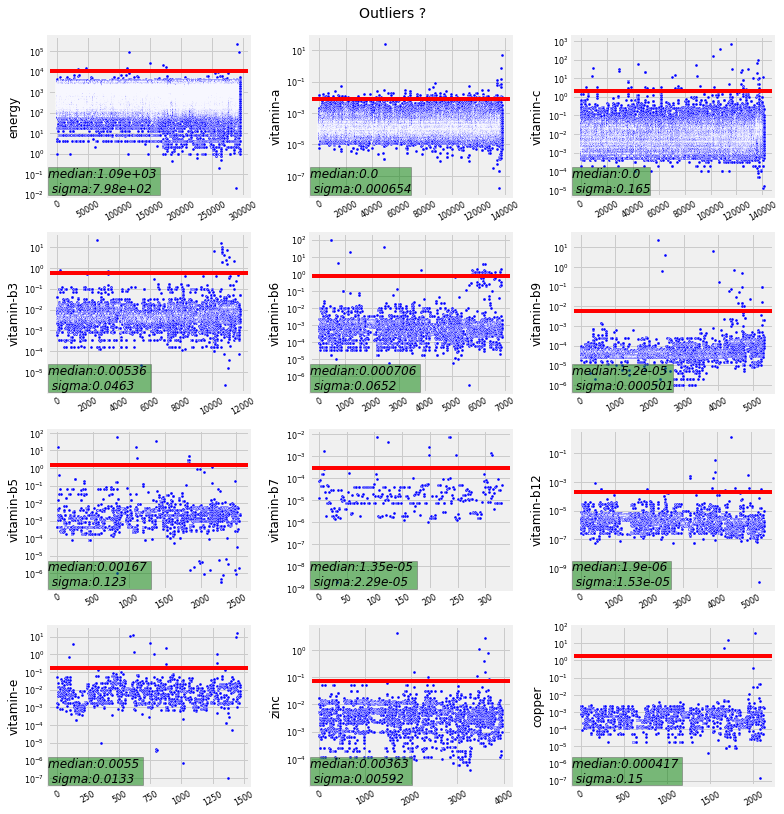

In [30]:
#plt.style.use('ggplot')
#defintiely some outliers from the results
tPlot, axes = plt.subplots(nrows=4, ncols=3, sharex=False, sharey=False, figsize=(11,11))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = quantite[i]
    test = df_new[pd.notnull(df_new[colonne])][colonne]
    ax.tick_params(labelcolor='black',top='off',bottom='on',left='on',right='off',labelsize=8)
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 12)
    ax.set_yscale("log")
    ax.plot(list(test), 'b.', markeredgewidth = 0.3, markeredgecolor='w')
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    ax.axhline(y=mediane[i] + 12*sigma[i], color='r', linestyle='-')
    ax.text(0., 0.02, 'median:{:.3} \n sigma:{:.3}'.format(mediane[i], sigma[i]),
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'green', 'alpha':0.5, 'pad':0})
    i += 1

tPlot.text(0.5, 1.01, "Outliers ?", ha='center', fontsize = 14)
plt.tight_layout()

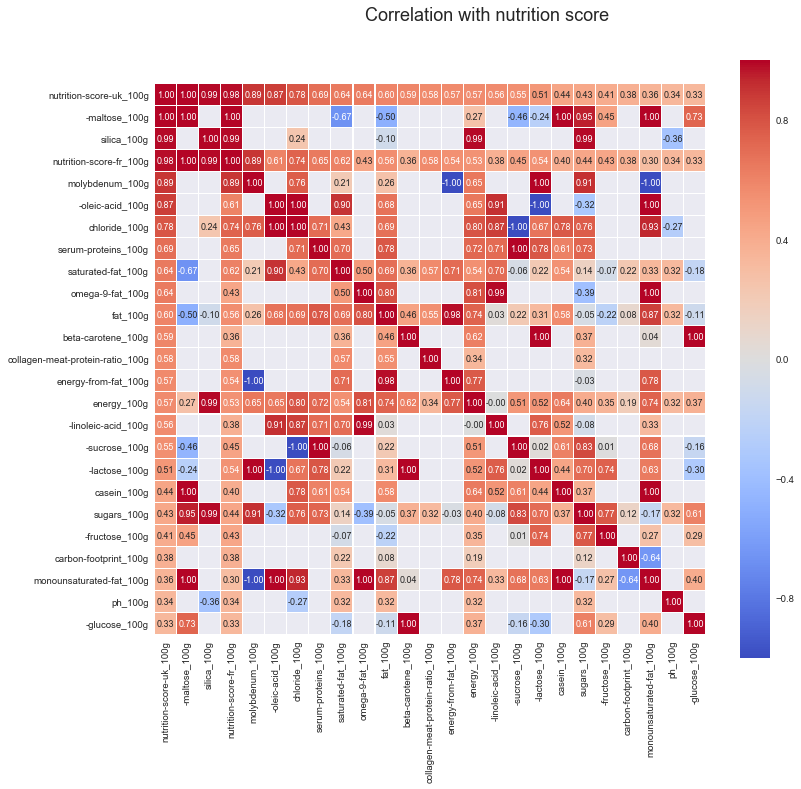

In [32]:
#heatmap of correlation with nutrition score
sns.set(context="paper", font_scale = 1.2)
corrmat = df_new.corr()
f, ax = plt.subplots(figsize=(11, 11))
cols = corrmat.nlargest(25, 'nutrition-score-uk_100g')['nutrition-score-uk_100g'].index
cm = corrmat.loc[cols, cols] 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation with nutrition score", ha='center', fontsize = 18)
plt.show()

In [33]:
df_new['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Beverages', 'Composite foods', 'Fish Meat Eggs', 'Fat and sauces',
       'Salty snacks', 'Cereals and potatoes', 'Milk and dairy products'], dtype=object)

In [34]:
categ_prod = [] ; label_prod = []
for i,s in enumerate(df_new['pnns_groups_1'].unique()):
    if isinstance(s, float): continue
    if s == 'unknown': continue    
    produit = str(s)
    df1 = df_new[df_new['pnns_groups_1'] == produit]
    table_1 = pd.Series(df1[pd.notnull(df1['nutrition-score-uk_100g'])]['nutrition-score-uk_100g'])
    categ_prod.append(table_1)
    label_prod.append(s)

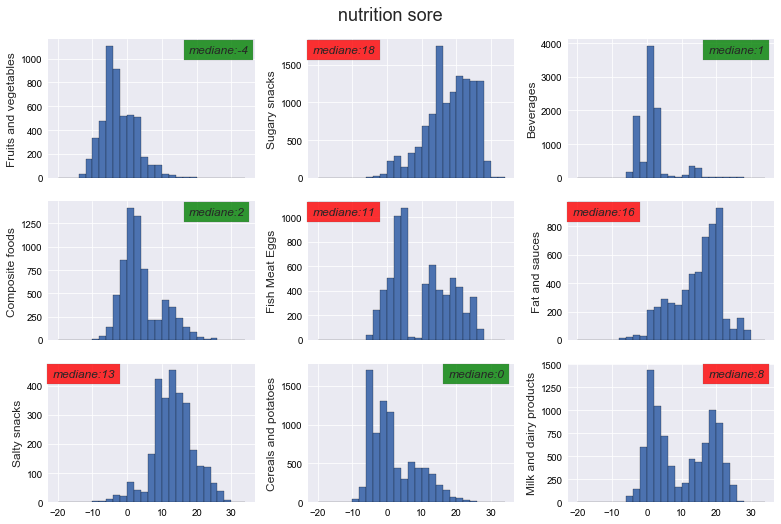

In [35]:
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=False, figsize=(11,7))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    t = categ_prod[i].value_counts(sort=True)
    t.sort_index(inplace=True)
    hist = list(t)
    bins = list(t.index)
    
    ax.tick_params(labelcolor='black', top='off', bottom='on', left='on', right='off')
    ax.set_ylabel(label_prod[i], fontsize = 12)
    ax.hist(categ_prod[i], bins=range(-20,36,2), edgecolor = 'k')

    mediane = int(categ_prod[i].median())
    color = 'green' if mediane <= 4 else 'red'
    if mediane < 11:
        ax.text(0.68, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
                transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':color, 'alpha':0.8, 'pad':5})
    else:
        ax.text(0.02, 0.9, 'mediane:{}'.format(int(categ_prod[i].median())), style='italic',
                transform=ax.transAxes, fontsize = 12,
                bbox={'facecolor':'red', 'alpha':0.8, 'pad':5})
    i += 1

tPlot.text(0.5, 1.01, 'nutrition sore', ha='center', fontsize = 18)
plt.tight_layout()

In [36]:
def spider(values, cat, ax):
    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]
    # for circularity
    values += values[:1]
    x_as += x_as[:1]
    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")
    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Set position of y-labels
    ax.set_rlabel_position(0)
    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    # Set ticks values and labels    
    ax.set_xticks(x_as[:-1])
    ax.set_xticklabels([])
    ax.set_yticks([0.1, 0.5, 1, 2, 10])
    ax.set_yticklabels(["0.1", "0.5", "1", "2", "10"])
    # Plot data
    ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)
    # Fill area
    ax.fill(x_as, values, 'b', alpha=0.3)
    # Set axes limits
    ax.set_ylim(0, 3)
    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi
        if angle_rad == 0:
            ha, distance_ax = "center", 3
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 3
        elif angle_rad == pi:
            ha, distance_ax = "center", 3
        else:
            ha, distance_ax = "right", 3

        ax.text(angle_rad, 0.2+distance_ax, cat[i], size=10,
                horizontalalignment=ha, verticalalignment="center")

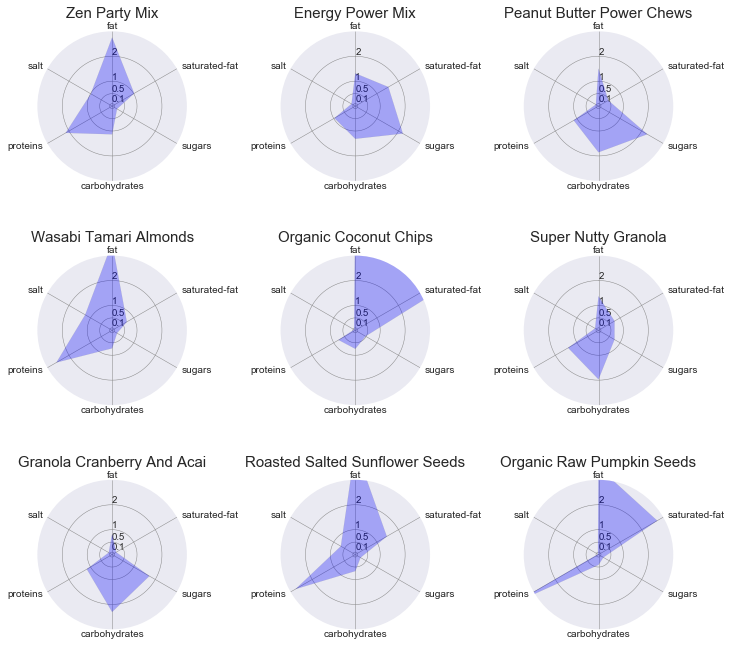

In [39]:
liste_columns = ['fat_100g', 'saturated-fat_100g', 'sugars_100g', 'carbohydrates_100g',
                 'proteins_100g', 'salt_100g']

df_chart = df_new[pd.notnull(df_new[liste_columns]).all(axis = 1)]
mean_values = list(df_chart[liste_columns].mean().values)

fig, axes = plt.subplots(nrows=3, ncols=3, subplot_kw=dict(projection='polar'), figsize=(11,11))
axes = np.array(axes)

list_nutriments = [s.strip('_100g') for s in liste_columns]

ind = 0
for ax in axes.reshape(-1):
    ind += 1
    ind2 = 4*ind
    absolute_values = list(df_chart.iloc[ind2][liste_columns].T.values)
    values  = [ val/mean_values[i] for i, val in enumerate(absolute_values)]
    spider(values, list_nutriments, ax)
    ax.set_title(df_chart.iloc[ind2]['product_name'], fontsize = 15)
    
fig.subplots_adjust(hspace=0.5)
plt.show()

#### Analysis

In [85]:
# Keep only consistent features (less of 60% NaN values)
de = df.isnull().mean(axis=0)
list1 = []
for i in range(0,len(de)):
    if de[i] < 0.6:
        templist = list(de[de==de[i]].index) 
        for i in range (0,len(templist)):
            list1.append(templist[i])

consistent_feature = list(set(list1)) 
df_newfeat = df.loc[:, lambda df: consistent_feature] 
df_newfeat.shape

(356027, 38)

In [86]:
#Remove unwanted features
NoList = ["code","url","states_en", "countries_tags","additives","brands",
          "last_modified_datetime","creator","additives_tags",
          "states","states_tags","ingredients_text","created_datetime",
          "serving_size","created_t","nutrition-score-uk_100g","countries",
          "last_modified_t","brands_tags","additives_en",
          "ingredients_that_may_be_from_palm_oil_n"]

for i in range (0,len(NoList)):
    consistent_feature.remove(NoList[i])

df_newfeat = df.loc[:, lambda df: consistent_feature]
df_newfeat.shape

(356027, 17)

In [87]:
list_temp = ["product_name","countries_en","nutrition_grade_fr","nutrition-score-fr_100g"]
featlist = list(df_newfeat)
for i in range(0,len(list_temp)):
    featlist.remove(list_temp[i])

# Replace NaN value by 0 for nuremic features.
for i in range(len(featlist)):
    df_newfeat[featlist[i]].fillna(0, inplace=True)
# Replace NaN value by Unknow for categorial features
df_newfeat["countries_en"].fillna("Unknow", inplace=True)
df_newfeat["product_name"].fillna("Unknow", inplace=True)


Training/Testing Set

In [88]:
#Train
Dnutri_Nano = df_newfeat.dropna(axis=0, how='any') 
Dnutri_Nano = df_newfeat.sort_values(by=["nutrition_grade_fr"] , ascending=[True])
Dnutri_Nano.shape

(356027, 17)

In [89]:
#Test
Dnutri_score_less = df_newfeat[pd.isnull(df_newfeat['nutrition_grade_fr'])]
Dnutri_score_less.shape

(101171, 17)

#### Feature Engineering

In [90]:
index_list = Dnutri_Nano["countries_en"].value_counts().index
index_list = index_list.drop(['United States', 'France', 'Switzerland', 
                              'Germany'])
for i in index_list:
    Dnutri_Nano["countries_en"].replace({i : "Other_Pays" }, inplace=True)

In [91]:
#One hot Encoding
Dnutri_Nano = pd.get_dummies(Dnutri_Nano, columns=["countries_en"], prefix=["From"])

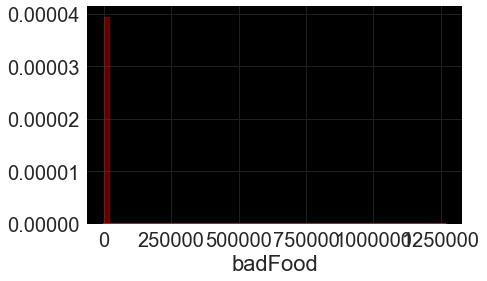

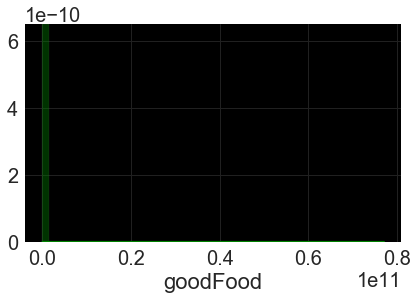

In [92]:
#define new fetures
badFood =  ((Dnutri_Nano["sugars_100g"]) + (Dnutri_Nano["sodium_100g"]*5) + (Dnutri_Nano["saturated-fat_100g"])) / (Dnutri_Nano["fiber_100g"]+0.1)
goodFood =  (Dnutri_Nano["fiber_100g"])/(Dnutri_Nano["saturated-fat_100g"]+0.1)

Dnutri_Nano["badFood"]= badFood
Dnutri_Nano["goodFood"]= goodFood

for i in ["badFood","goodFood"]:
    if i == "badFood":
        colordist = "red"
    else:
        colordist = "green"
    plt.rcParams['axes.facecolor'] = 'black'
    plt.rc('grid', color='#202020')
    sns.distplot(Dnutri_Nano[i], kde=True, color=colordist)
    plt.show()

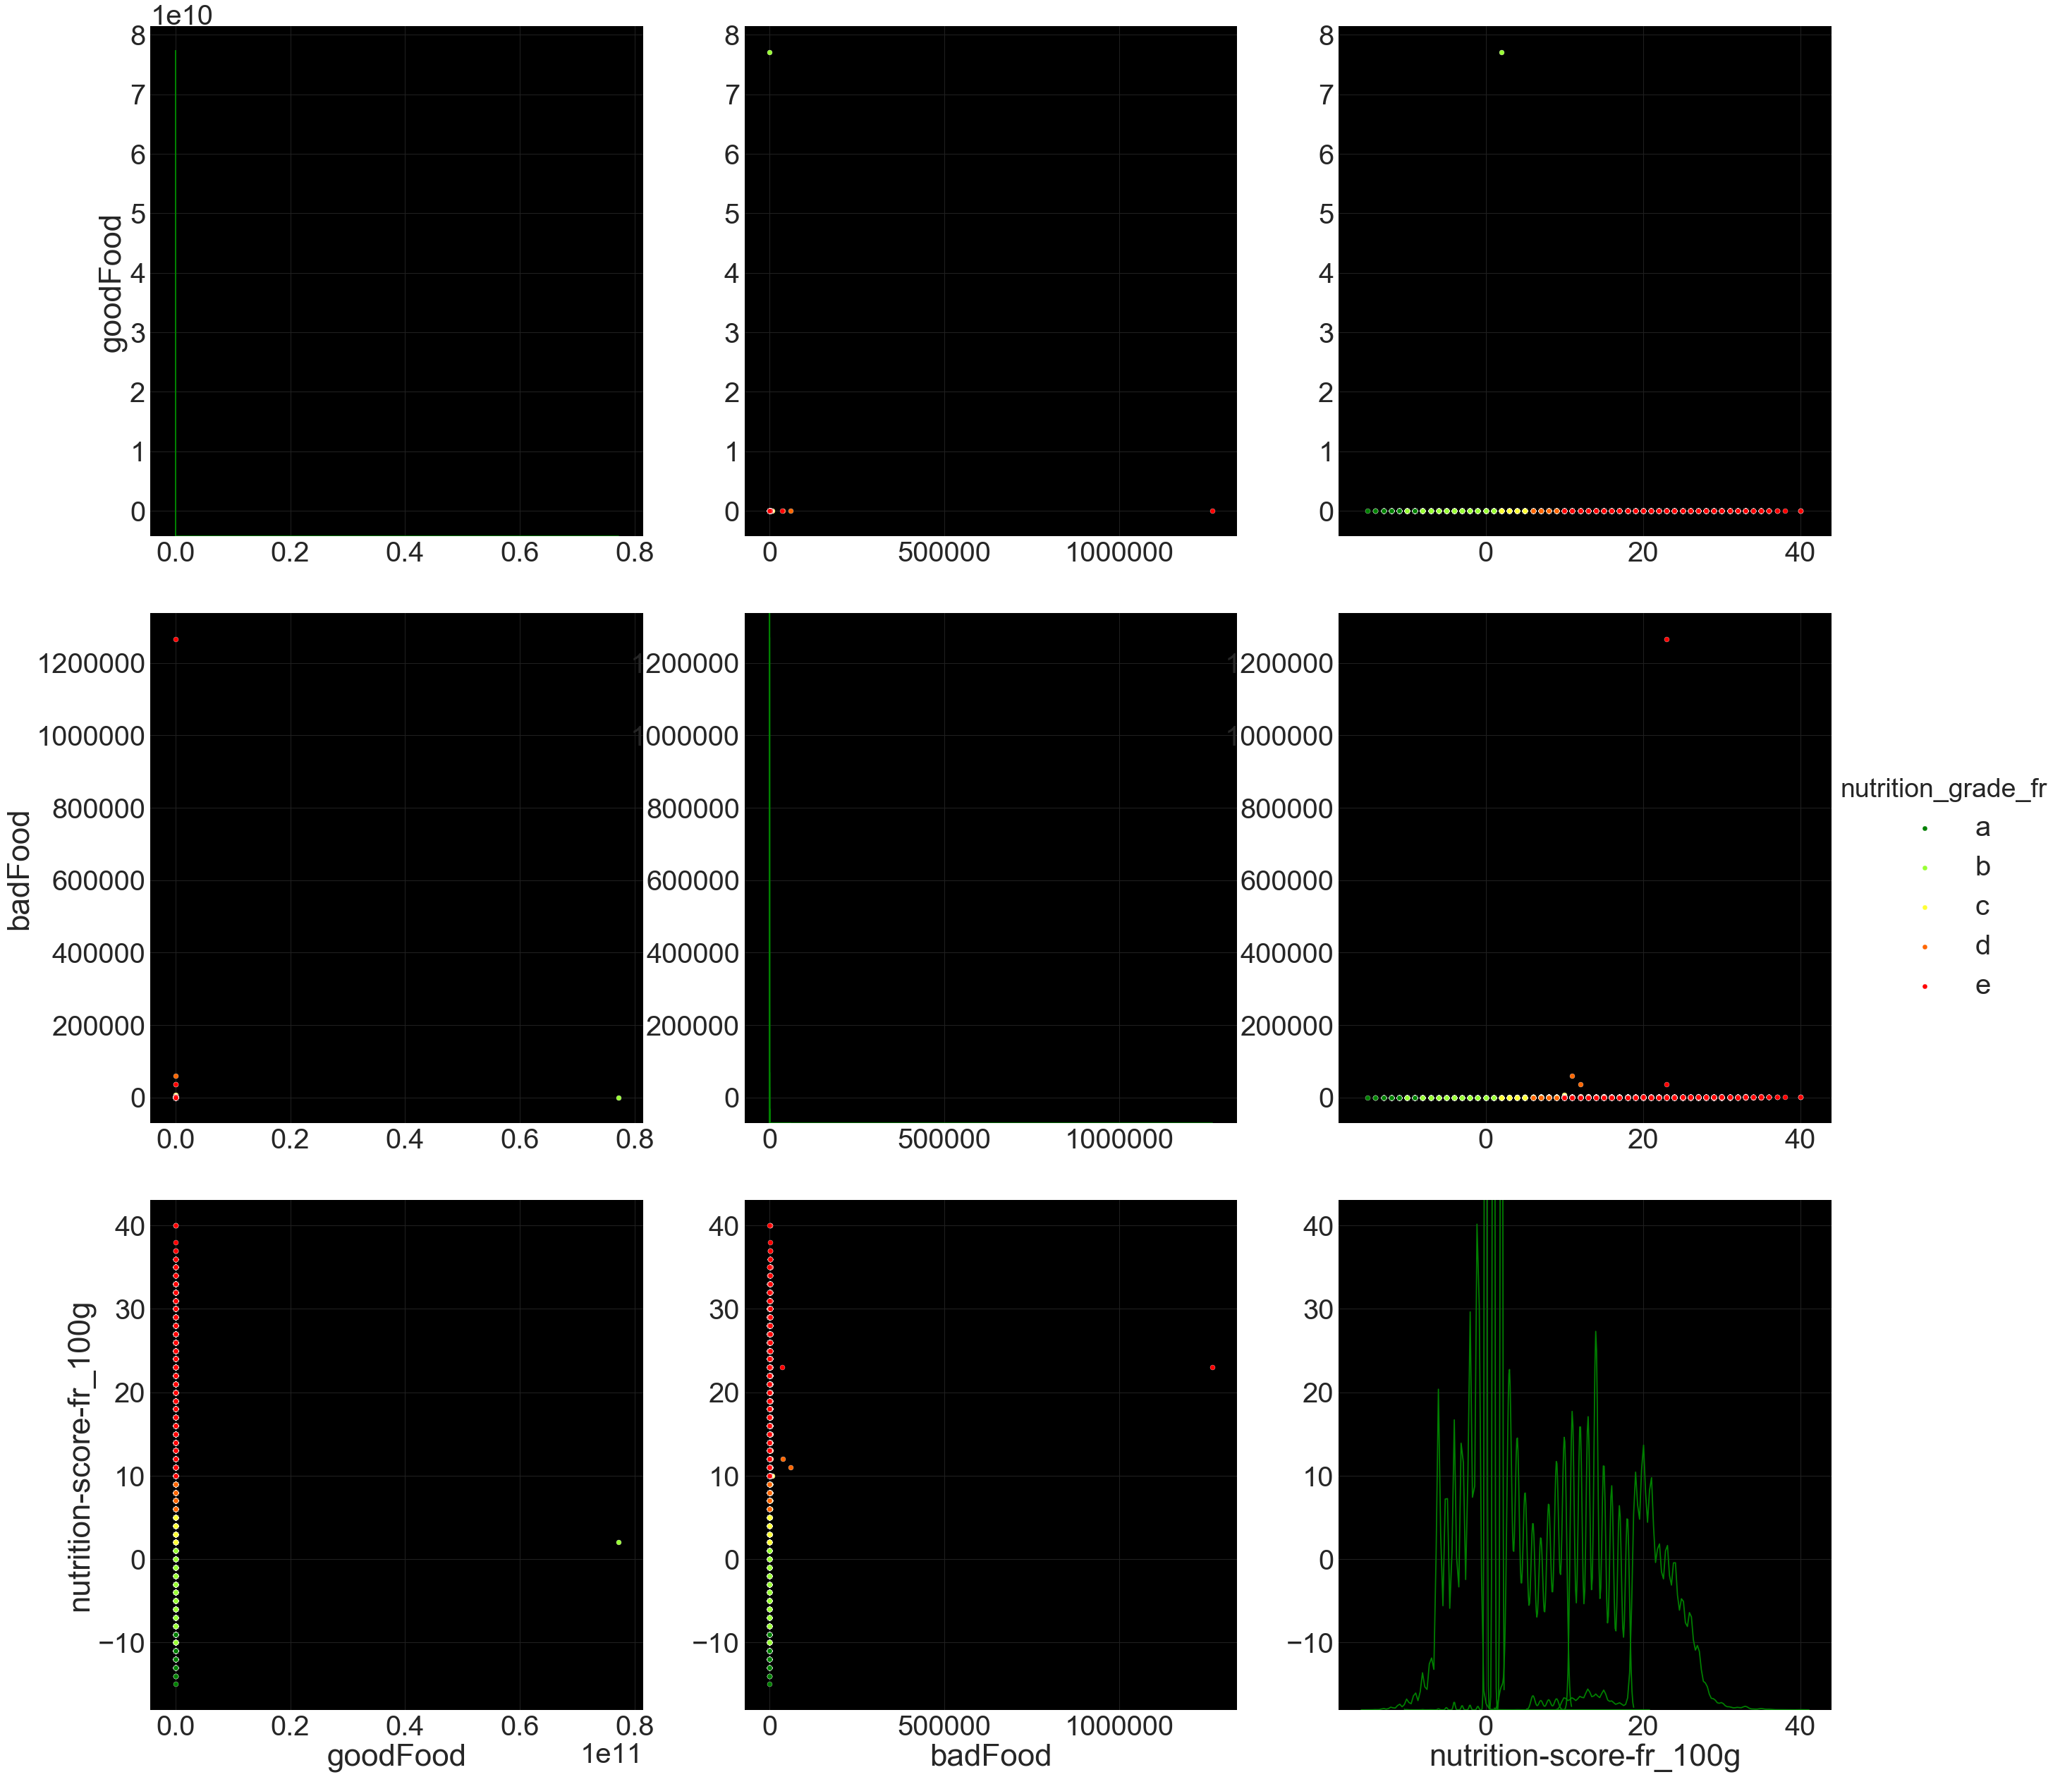

In [93]:
#check correlation between the new variables and nutritional score
sns.set(font_scale=4)
flatui = ["green", "#99FF33", "#FFFF33", "#FF6600", "#FF0000"]
plt.rcParams['axes.facecolor'] = 'black'
plt.rc('grid', color='#202020')
sns.pairplot(Dnutri_Nano[["goodFood","badFood","nutrition-score-fr_100g","nutrition_grade_fr"]],
             hue="nutrition_grade_fr", diag_kind="kde",size =12, palette=flatui)

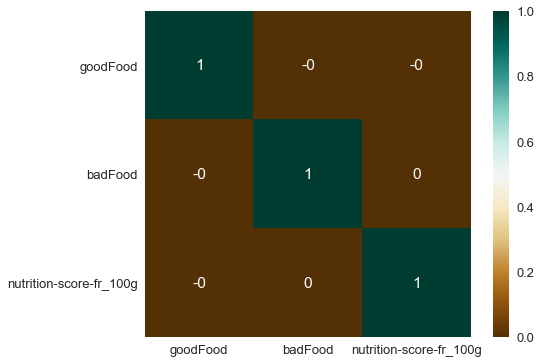

In [94]:
corr = Dnutri_Nano[["goodFood","badFood","nutrition-score-fr_100g"]].corr()
corr = corr.round(1)
plt.figure(figsize=(7, 6))

sns.set(font_scale=1.3)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, cmap="BrBG",square=True)

#### PCA

In [96]:
headers = list(Dnutri_Nano)
index = Dnutri_Nano["product_name"]
nutrigrade = Dnutri_Nano["nutrition_grade_fr"]
D = Dnutri_Nano.drop("nutrition_grade_fr",1)
D = D.drop("product_name",1)
D = D.drop("nutrition-score-fr_100g",1)

# Data Standardizing
std_scale = preprocessing.StandardScaler().fit(D)
nutri_scaled = std_scale.transform(D)

In [97]:
# Run PCA
pca = decomposition.PCA()
pca.fit(nutri_scaled)
print (pca.explained_variance_ratio_)

[  1.50005282e-01   1.49680807e-01   1.07643013e-01   9.99970196e-02
   8.16727587e-02   5.94208466e-02   5.58646787e-02   5.26995096e-02
   5.05032387e-02   4.99168284e-02   4.95306444e-02   4.08398259e-02
   3.46807089e-02   1.72352193e-02   3.09618946e-04   2.67309414e-12
   2.28442020e-14   6.02976076e-15   8.81923341e-16   2.78190655e-28]


In [98]:
print (pca.explained_variance_ratio_.cumsum())

[ 0.15000528  0.29968609  0.4073291   0.50732612  0.58899888  0.64841973
  0.70428441  0.75698392  0.80748715  0.85740398  0.90693463  0.94777445
  0.98245516  0.99969038  1.          1.          1.          1.          1.
  1.        ]


The first component catch 17% of the variance. 80% of the variance can be explained with the 8 first components.

ValueError: Grouper and axis must be same length

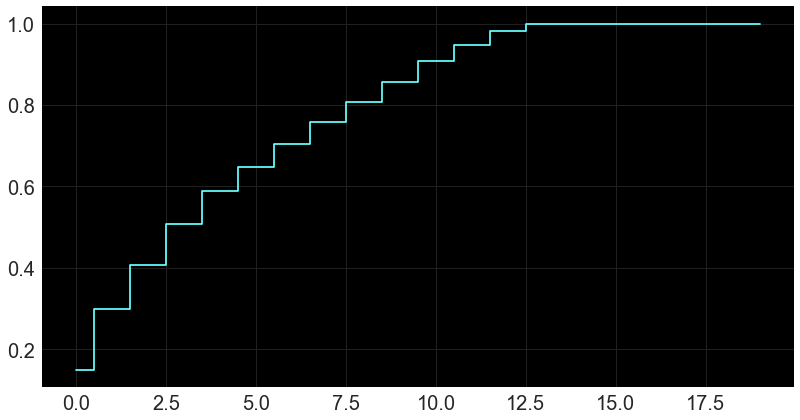

In [99]:
plt.figure(figsize=(12, 7))
sns.set(font_scale=2)
plt.rcParams['axes.facecolor'] = 'black'
plt.rc('grid', color='#202020')

plt.step(range(20), pca.explained_variance_ratio_.cumsum(), where='mid',color="#66FFFF")
sns.barplot(np.arange(1,17),pca.explained_variance_ratio_,palette="PuBuGn_d")


In [108]:
pca2 = decomposition.PCA(n_components=8)
pca2.fit(nutri_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [106]:
pcs = pca2.components_
def PCA_plot (components,comp1,comp2):
    plt.figure(figsize=(12, 12))
    for i, (x, y) in enumerate(zip(components[comp1, :], components[comp2, :])):
        # Display origine segment (x, y)
        plt.plot([0, x], [0, y], color='#00FFFF')
        
        plt.text(x, y, D.columns[i], fontsize='12', color='#FFFF99')

    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])

# To assign each individual a color corresponding to their nutrition grade 
# This will be useful when vizualing
conv = Dnutri_Nano["nutrition_grade_fr"].replace('a', "green")
conv = conv.replace('b', "#99FF33")
conv = conv.replace('c', "#FFFF33")
conv = conv.replace('d', "#FF6600")
conv = conv.replace('e', "#FF0000")
Dnutri_Nano['nutrigrade_num'] = pd.Series(conv, index=Dnutri_Nano.index)

def scatterP_c (x,y):
    plt.figure(figsize=(12, 12))
    X_projected = pca2.transform(nutri_scaled)

    plt.scatter(X_projected[:, x], X_projected[:, y],
    c=Dnutri_Nano.get('nutrigrade_num'))
    plt.xlim([-15, 40])
    plt.ylim([-25, 40])
    plt.rcParams['axes.facecolor'] = 'k'
    plt.rc('grid', color='#202020')

ValueError: c of shape (356027,) not acceptable as a color sequence for x with size 356027, y with size 356027

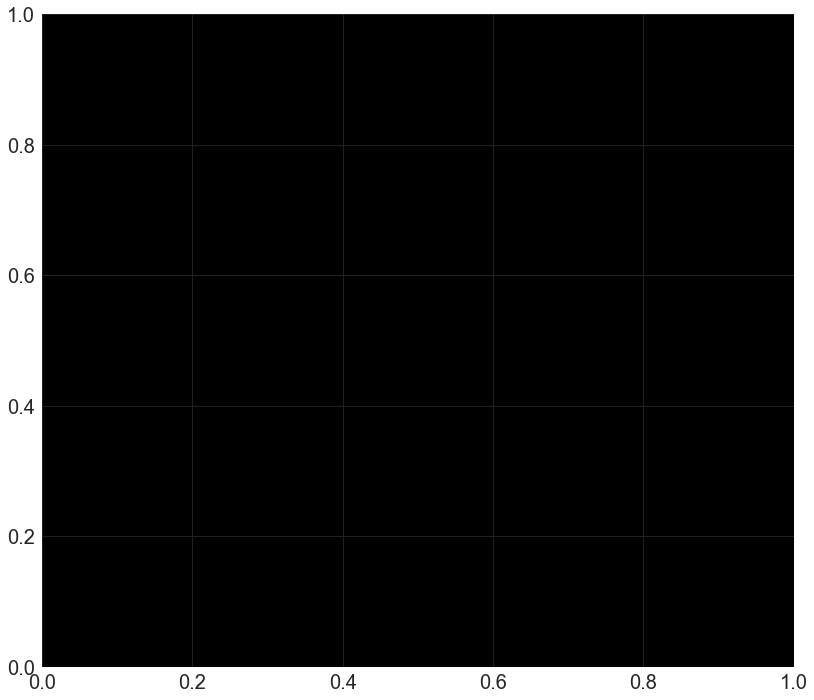

In [107]:
scatterP_c(0,1)
PCA_plot(pcs,0,1)

In [109]:
#We can see that some features have small impact on principal compenent. We will delete them.
D = D.drop("From_Germany",1)
D = D.drop("From_Switzerland",1)
D = D.drop("From_Other_Pays",1)

#### Modeling and Prediction - KNN Model

In [110]:
#Sampling
NutriSpl = (random.sample(list(D.index),150000))

data_entry = D.loc[NutriSpl]
#data_entry = data_entry.drop("nutrigrade_num",1)
data_target = nutrigrade.loc[NutriSpl]

In [111]:
print(data_entry.shape)
print(data_target.shape)

(150000, 17)
(150000,)


In [112]:
#Testing set / Trainning set
Xtrain, Xtest, ytrain, ytest = train_test_split(data_entry, data_target, train_size=0.8,random_state=1)
# Training with KNN
# Optimisation du score
error_list = []
for k in range(2,17):
    knn = neighbors.KNeighborsClassifier(k) # training !
    error_list.append(100*(1-knn.fit(Xtrain, ytrain).score(Xtest,ytest))) # compute error on testing set
    
# Display KNN performence in term of K
plt.figure(figsize=(17, 17))
plt.plot(range(2,17), error_list,'go-', markersize =8)
plt.ylabel('error (%)')
plt.xlabel('k')
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'

In [113]:
NutriSpl = (random.sample(list(D.index),230000))

data_entry = D.loc[NutriSpl]
data_target = nutrigrade.loc[NutriSpl]

Xtrain, Xtest, ytrain, ytest = train_test_split(data_entry, data_target, train_size=0.8,random_state=1)

# Training  KNN
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain) 
error = (1 - knn.score(Xtest, ytest))*100  # compute error on testing set
error

TypeError: '<' not supported between instances of 'float' and 'str'

#### Prediction

In [115]:
def splitDataFrameList(df, target_column, separator):
    '''Split rows with several countries
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

Dnutri_Nano = splitDataFrameList(Dnutri_Nano, "countries_en", ",")

KeyError: ('countries_en', 'occurred at index 100999')

In [116]:
# Apply the same treatment on our testing set.
Dnutri_score_less = splitDataFrameList(Dnutri_score_less, "countries_en", ",")

index_list = Dnutri_score_less["countries_en"].value_counts().index
index_list = index_list.drop(['United States','France', 'Switzerland','Germany'])
for i in index_list:
    Dnutri_score_less["countries_en"].replace({i : "Other_Pays" }, inplace=True)
Dnutri_score_less = pd.get_dummies(Dnutri_score_less, columns=["countries_en"], prefix=["From"])

Dnutri_score_less = Dnutri_score_less.drop("vitamin-c_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("vitamin-a_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("iron_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("calcium_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("cholesterol_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("salt_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("ingredients_from_palm_oil_n",1)
Dnutri_score_less = Dnutri_score_less.drop("product_name",1)
Dnutri_score_less = Dnutri_score_less.drop("nutrition-score-fr_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("nutrition_grade_fr",1)
Dnutri_score_less = Dnutri_score_less.drop("trans-fat_100g",1)
Dnutri_score_less = Dnutri_score_less.drop("From_Germany",1)
Dnutri_score_less = Dnutri_score_less.drop("From_Switzerland",1)
Dnutri_score_less = Dnutri_score_less.drop("From_Other_Pays",1)

badFood =  ((Dnutri_score_less["sugars_100g"]) + (Dnutri_score_less["sodium_100g"]*5) + (Dnutri_score_less["saturated-fat_100g"])) / (Dnutri_score_less["fiber_100g"]+0.1) 
goodFood =  (Dnutri_score_less["fiber_100g"])/(Dnutri_score_less["saturated-fat_100g"]+0.1)

Dnutri_score_less["badFood"]= badFood
Dnutri_score_less["goodFood"]= goodFood

dd = Dnutri_score_less[D.columns.tolist()]

ValueError: labels ['vitamin-c_100g'] not contained in axis